# Downloading ISIC Images
Images are at the heart of the ISIC Archive, and this notebook
uses the ```isicarchive``` package to retrieve images from the
archive.

## Preparation
Please ensure that the ```isicarchive``` package is installed:

```
pip install isicarchive
```

## Configuration
All access is done via the ```IsicApi``` object. A call to the
```cache_images()``` method downloads information (or rather
meta-information) about all images that are available with the
current login/authentication token. **If you intend to use the
```cache_images()``` method, please make sure to use different
cache folders if you want to work with both publicly available
and private images in separate sessions.**

## Demonstration
In this demo, all images that have a specific diagnosis (from
among the available images) will be selected, and a random
image will be displayed.

In [1]:
# imports
import os
import random
import shutil

from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm

from isicarchive.api import IsicApi

# Settings (please adapt to your needs!)
username = None

# DO NOT PUT A PASSWORD into the document, it will be requested,
# or you can store it in a privately readable ~/.netrc file!

# setup folders
doc_folder = '.' + os.sep
cache_folder = doc_folder + 'cache'

# setting debug flag, this will print out every web-API operation
debug = False

# Preparation
api = IsicApi(username, cache_folder=cache_folder, debug=debug)

In [2]:
# caching images and segmentations; this can take a long time!!
# so you may want to skip this cell for now...
api.cache_images()
#api.cache_segmentations()

In [3]:
# show datasets
api.datasets

{'2018 JID Editorial Images': '5aa2baff1165972a9e961672',
 'Dermoscopedia (CC-0)': '5a74e97a11659731f017fabf',
 'Dermoscopedia (CC-BY)': '5a74e98011659731f017fac1',
 'Dermoscopedia (CC-BY-NC)': '5a74e98611659731f017fac3',
 'HAM10000': '5aaf6f2a116597691367292e',
 'MSK-1': '5a2ecc5d1165975c9459427e',
 'MSK-2': '5a2ecc5d1165975c94594284',
 'MSK-3': '5a2ecc5d1165975c9459428a',
 'MSK-4': '5a2ecc5d1165975c9459428e',
 'MSK-5': '5a2ecc5d1165975c94594292',
 'SONIC': '5a2ecc5e1165975c945942a0',
 'UDA-1': '5a2ecc5e1165975c945942a2',
 'UDA-2': '5a2ecc5e1165975c945942a4'}

In [4]:
# load a dataset
dataset_name = 'HAM10000'
dataset = api.dataset(dataset_name)

# load image information into the dataset
dataset.load_images()

# show information
dataset

isicarchive.dataset.Dataset({
    'id': '5aaf6f2a116597691367292e',
    'name': 'HAM10000',
    'description': 'Dermatoscopic images of the most common classes of pigmented skin lesions: Pigmented Actinic Keratoses / Bowen's disease, Basal Cell Carcinoma, Benign Keratoses (Seborrheic Keratosis, Solar Lentigo and Lichen-Planus Like Keratosis), Dermatofibroma, Melanocytic Nevi, Melanoma and Vascular lesions. Images are made available in preparation for the "Human-Against-Machine with 10000 training images" study, and originate mainly from the ViDIR Group (Department of Dermatology, Medical University of Vienna) and a skin cancer office in Australia (School of Medicine, University of Queensland). Data is provided under the CC BY-NC 4.0 license, attribution should be made by referencing the data descriptor manuscript:

Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161

In [5]:
# select images from a dataset
diagnosis_name = 'melanoma'
selection = api.select_images([
    ['dataset.name', '==', dataset_name],
    ['meta.clinical.diagnosis', '==', diagnosis_name],
])
print(f'There are {len(selection)} images with a {diagnosis_name} diagnosis in dataset {dataset_name}')

There are 1113 images with a melanoma diagnosis in dataset HAM10000


In [6]:
# target folder
target_folder = 'local_collection'
os.makedirs(target_folder, exist_ok=True)

# download those images
for image_id, image_info in tqdm(selection.items()):
    
    # create image object
    image = api.image(image_info)
    
    # target filename
    target_filename = target_folder + os.sep + image_info['name'] + '.jpg'
    if os.path.exists(target_filename):
        continue

    # download data
    image.load_image_data()
    
    # copy data to target folder
    cache_filename = api.cache_filename(image_id, 'image', '.jpg', image_info['name'])
    shutil.copyfile(cache_filename, target_filename)
    
    # clear data (to free memory!)
    image.clear_data()

100%|██████████| 1113/1113 [00:00<00:00, 69206.58it/s]


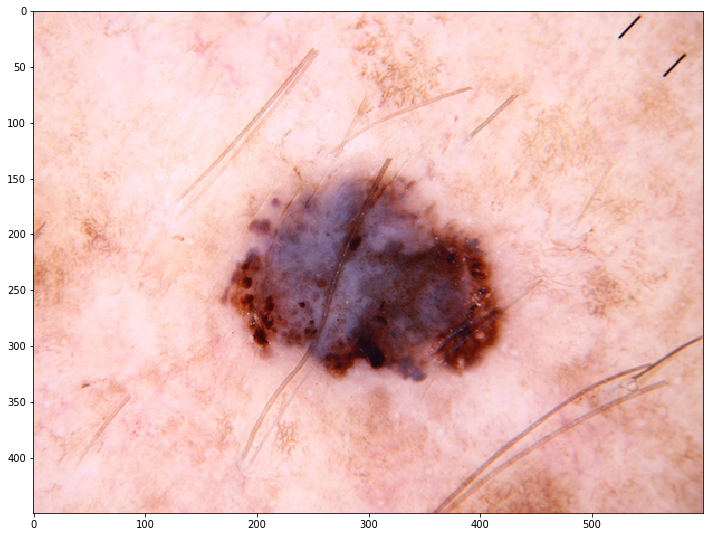

In [7]:
# display a random image
import random
random_image_id = random.choice(list(selection.keys()))
image = api.image(random_image_id)
image.load_image_data()

fig = plt.figure(figsize=(12,12))
plt.imshow(image.data)